In [4]:
!git clone https://github.com/ISAAC-Neumoton/Data-wrangling-Projects


Cloning into 'Data-wrangling-Projects'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 36 (delta 15), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (36/36), 3.99 MiB | 13.31 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [6]:
os.chdir('/content/Data-wrangling-Projects/Job Market Analytics')

In [7]:
!pwd

/content/Data-wrangling-Projects/Job Market Analytics


In [23]:
import seaborn as sns
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
import os
warnings.filterwarnings("ignore")



# Salary Insights Preparation

Prepare a clean and reliable subset of the dataset focused on salary calculations and compensation analysis.
•	Salary values exist in multiple formats (annual, hourly).
•	Many rows have missing or partial salary information.
•	salary_rate may need normalization (“yr”, “hr”, “annually”, etc.).
•	Outliers or invalid salary values may distort insights.
## Key Questions This Wrangling Should Answer
•	What is the distribution of salaries across job roles?
•	How do salaries vary by location or job type?
•	Are remote jobs paid differently from on-site roles?
•	What percent of postings disclose salary information?


## LOAD DATA FROM EXCEL WORKBOOK

In [8]:
def load_df():
    # file path
    file = "data/data_jobs_salary_monthly.xlsx"
    # names of the sheets
    months = ["Jan","Feb","Mar","Apr","May","Jun",
              "Jul","Aug","Sep","Oct","Nov","Dec"]
    # load data from excel sheets into the DataFrame
    df_list = [pd.read_excel(file, sheet_name=m) for m in months]

    df = pd.concat(df_list, axis=0, ignore_index=True)
    return df


In [9]:
df = load_df()
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills
0,Data Scientist,Data Scientist - TikTok Ads,"Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-02 15:01:03,False,True,United States,year,224500.0,NaN,TikTok,"['r', 'python', 'matlab', 'sql']"
1,Data Scientist,Data Scientist - Technical Platform,"Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-12 04:04:48,False,True,United States,year,157500.0,NaN,TikTok,"['sql', 'python']"
2,Data Scientist,Data Scientist - Computer Vision,"Paris, France",via Ai-Jobs.net,Full-time,False,France,2023-01-30 08:13:55,False,False,France,year,88128.0,NaN,digiRocks,"['python', 'c++', 'pytorch', 'tensorflow', 'ke..."
3,Data Scientist,Senior Actuarial Consultant and Data Scientist...,"Las Vegas, NV","via Las Vegas, NV - Geebo",Full-time,False,"California, United States",2023-01-27 00:05:41,False,True,United States,hour,NaN,24.0,UnitedHealth Group,"['r', 'python', 'vba', 'sas', 'sas', 'sql', 'd..."
4,Data Scientist,Data Scientist Digital Effectiveness Operation...,"Sun City, AZ",via ZipRecruiter,Full-time,False,"California, United States",2023-01-29 10:04:53,False,True,United States,year,105800.0,NaN,Cox Communications,"['sql', 'python', 'aws', 'pandas', 'numpy', 's..."


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32672 entries, 0 to 32671
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   job_title_short        32672 non-null  object        
 1   job_title              32672 non-null  object        
 2   job_location           32317 non-null  object        
 3   job_via                32662 non-null  object        
 4   job_schedule_type      32531 non-null  object        
 5   job_work_from_home     32672 non-null  bool          
 6   search_location        32672 non-null  object        
 7   job_posted_date        32672 non-null  datetime64[ns]
 8   job_no_degree_mention  32672 non-null  bool          
 9   job_health_insurance   32672 non-null  bool          
 10  job_country            32672 non-null  object        
 11  salary_rate            32672 non-null  object        
 12  salary_year_avg        22036 non-null  float64       
 13  s

### JOB DOMAIN INFORMATION

In [24]:
def extract_job_domain(row):
    # If "-" exists, split and check first part
    if '-' in row['job_title']:
        first_part, second_part = map(str.strip, row['job_title'].split('-', 1))
        # Only take second part if first part matches job_title_short
        if first_part in df['job_title_short'].values:
            return second_part
    # If no "-" or first part invalid, keep original job_title
    return row['job_title']

# Apply to create job_domain column
df['job_domain'] = df.apply(extract_job_domain, axis=1)


When you use *_df.apply(function_name, axis=1)_*, pandas passes each row as a Series object to your function. The parameter name (here, row) can be anything you choose - it represents one entire row of the DataFrame

split('-', 1): Split the string at the first dash only (maxsplit=1).

map(str.strip, ...): Apply strip() to remove whitespace from both resulting parts

***Syntax: DataFrame.apply(function, axis)***

***- axis=0: Apply function to each COLUMN (default)***

***- axis=1: Apply function to each ROW  ← This is what we're using***

In [12]:
# Get current column order
cols = df.columns.tolist()
# Remove 'job_domain' from its current position
cols.remove('job_domain')
# Insert 'job_domain' right after the first column (index 1)
cols.insert(1, 'job_domain')
# Reorder the DataFrame
df_domain = df[cols]
df_domain.head(15)

,job_title_short,job_domain,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills
0,Data Scientist,TikTok Ads,Data Scientist - TikTok Ads,"Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-02 15:01:03,False,True,United States,year,224500.0,NaN,TikTok,"['r', 'python', 'matlab', 'sql']"
1,Data Scientist,Technical Platform,Data Scientist - Technical Platform,"Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-12 04:04:48,False,True,United States,year,157500.0,NaN,TikTok,"['sql', 'python']"
2,Data Scientist,Computer Vision,Data Scientist - Computer Vision,"Paris, France",via Ai-Jobs.net,Full-time,False,France,2023-01-30 08:13:55,False,False,France,year,88128.0,NaN,digiRocks,"['python', 'c++', 'pytorch', 'tensorflow', 'ke..."
3,Data Scientist,Senior Actuarial Consultant and Data Scientist...,Senior Actuarial Consultant and Data Scientist...,"Las Vegas, NV","via Las Vegas, NV - Geebo",Full-time,False,"California, United States",2023-01-27 00:05:41,False,True,United States,hour,NaN,24.0,UnitedHealth Group,"['r', 'python', 'vba', 'sas', 'sas', 'sql', 'd..."
4,Data Scientist,Data Scientist Digital Effectiveness Operation...,Data Scientist Digital Effectiveness Operation...,"Sun City, AZ",via ZipRecruiter,Full-time,False,"California, United States",2023-01-29 10:04:53,False,True,United States,year,105800.0,NaN,Cox Communications,"['sql', 'python', 'aws', 'pandas', 'numpy', 's..."
5,Data Scientist,Marketing Analytics,Data Scientist - Marketing Analytics,"Irving, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-24 16:02:05,False,True,United States,year,115000.0,NaN,Cottonwood Financial,"['sql', 'sas', 'sas', 'python', 'r']"
6,Senior Data Analyst,Senior Data Analyst Business Optimization Inte...,Senior Data Analyst Business Optimization Inte...,"Bailey's Crossroads, VA",via ZipRecruiter,Full-time,False,"New York, United States",2023-01-04 10:00:41,False,True,United States,year,96500.0,NaN,Cox Communications,"['sql', 'snowflake', 'aws', 'microstrategy', '..."
7,Data Engineer,IT & Strategy Talent Programme - AI/ML and Dat...,IT & Strategy Talent Programme - AI/ML and Dat...,"Hamburg, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-01-12 20:44:40,False,False,Germany,year,98301.5,NaN,Vattenfall,['azure']
8,Senior Data Scientist,Senior Data Scientist,Senior Data Scientist,"El Mirage, AZ",via ZipRecruiter,Full-time,False,"California, United States",2023-01-29 10:04:52,False,True,United States,year,116700.0,NaN,Cox Communications,"['sql', 'r', 'python', 'scala', 'java', 'c++',..."
9,Data Engineer,Data Engineer,Data Engineer,"Chicago, IL",via Indeed,Full-time,False,"California, United States",2023-01-13 19:09:10,False,True,United States,year,102500.0,NaN,Alliant Credit Union,"['sql', 'azure', 'tableau']"


## Salary Data Wrangling — Clean Annual Salaries

In [13]:
def wrangle_year():
    # Remove the "via " prefix if it exists
    df_domain['job_via'] = df_domain['job_via'].str.replace(r'^via\s+', '', regex=True)

    # Select only the columns needed for salary analysis
    salary_cols = [
        'job_title_short',
        'job_domain',
        'job_location',
        'job_via',           # source
        'job_schedule_type',
        'job_work_from_home',
        'job_no_degree_mention',
        'job_country',
        'salary_rate',
        'salary_year_avg',   # keep only annual salary
        'company_name',
        'job_skills'
    ]
    df_salary = df_domain[salary_cols].copy()

    # Drop rows where critical columns are missing
    required_cols = [
        'salary_year_avg',
        'job_title_short',
        'job_location',
        'job_work_from_home',
        'job_country',
        'salary_rate',
        'job_schedule_type'
    ]
    df_salary = df_salary.dropna(subset=required_cols)
    df_salary['salary_year_avg'] = df_salary['salary_year_avg'].astype(int)
    return df_salary


In [14]:
annual_sal_df = wrangle_year()

In [15]:
annual_sal_df.head()

,job_title_short,job_domain,job_location,job_via,job_schedule_type,job_work_from_home,job_no_degree_mention,job_country,salary_rate,salary_year_avg,company_name,job_skills
0,Data Scientist,TikTok Ads,"Mountain View, CA",LinkedIn,Full-time,False,False,United States,year,224500,TikTok,"['r', 'python', 'matlab', 'sql']"
1,Data Scientist,Technical Platform,"Mountain View, CA",LinkedIn,Full-time,False,False,United States,year,157500,TikTok,"['sql', 'python']"
2,Data Scientist,Computer Vision,"Paris, France",Ai-Jobs.net,Full-time,False,False,France,year,88128,digiRocks,"['python', 'c++', 'pytorch', 'tensorflow', 'ke..."
4,Data Scientist,Data Scientist Digital Effectiveness Operation...,"Sun City, AZ",ZipRecruiter,Full-time,False,False,United States,year,105800,Cox Communications,"['sql', 'python', 'aws', 'pandas', 'numpy', 's..."
5,Data Scientist,Marketing Analytics,"Irving, TX",LinkedIn,Full-time,False,False,United States,year,115000,Cottonwood Financial,"['sql', 'sas', 'sas', 'python', 'r']"


In [16]:
annual_sal_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21741 entries, 0 to 32667
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   job_title_short        21741 non-null  object
 1   job_domain             21741 non-null  object
 2   job_location           21741 non-null  object
 3   job_via                21741 non-null  object
 4   job_schedule_type      21741 non-null  object
 5   job_work_from_home     21741 non-null  bool  
 6   job_no_degree_mention  21741 non-null  bool  
 7   job_country            21741 non-null  object
 8   salary_rate            21741 non-null  object
 9   salary_year_avg        21741 non-null  int64 
 10  company_name           21741 non-null  object
 11  job_skills             19945 non-null  object
dtypes: bool(2), int64(1), object(9)
memory usage: 1.9+ MB


In [17]:
annual_sal_df['salary_rate'].unique()

array(['year'], dtype=object)

In [81]:
def wrangle_hour():
    # Work on a copy to avoid modifying df_domain globally
    df = df_domain.copy()

    # Remove the "via " prefix
    df['job_via'] = df['job_via'].str.replace(r'^via\s+', '', regex=True)

    # Columns needed for salary analysis
    salary_cols = [
        'job_title_short',
        'job_domain',
        'job_location',
        'job_via',
        'job_schedule_type',
        'job_work_from_home',
        'job_no_degree_mention',
        'job_country',
        'salary_rate',
        'salary_hour_avg',
        'company_name',
        'job_skills'
    ]

    df_salary = df[salary_cols].copy()

    # Required fields for analysis
    required_cols = [
        'salary_hour_avg',
        'job_title_short',
        'job_location',
        'job_work_from_home',
        'job_country',
        'salary_rate',
        'job_schedule_type'
    ]

    # Drop rows where required fields are missing
    df_salary = df_salary.dropna(subset=required_cols)

    # Convert salary to int
    df_salary['salary_hour_avg'] = df_salary['salary_hour_avg'].astype(int)

    # Apply salary mask (remove outliers above $250/hr)
    df_salary = df_salary[df_salary['salary_hour_avg'] < 250]

    # recategorize rare platforms as other

    counts = df_salary['job_via'].value_counts()
    rare_platforms = counts[counts < 30].index
    df_salary['job_via'] = df_salary['job_via'].replace(rare_platforms, 'Other')

    return df_salary


# Run the function

hour_salary_df = wrangle_hour()

In [82]:
hour_salary_df.head(10)

,job_title_short,job_domain,job_location,job_via,job_schedule_type,job_work_from_home,job_no_degree_mention,job_country,salary_rate,salary_hour_avg,company_name,job_skills
3,Data Scientist,Senior Actuarial Consultant and Data Scientist...,"Las Vegas, NV",Other,Full-time,False,False,United States,hour,24,UnitedHealth Group,"['r', 'python', 'vba', 'sas', 'sas', 'sql', 'd..."
22,Data Scientist,Electronics Data Scientist Intern,Anywhere,Indeed,Full-time,True,False,United States,hour,21,MilliporeSigma,"['excel', 'outlook']"
23,Data Scientist,"Data Scientist (Genomics/Genetics, Python, AWS...",Anywhere,LinkedIn,Contractor,True,False,United States,hour,66,neteffects,"['python', 'r', 'sql', 'java', 'aws', 'gcp', '..."
24,Senior Data Analyst,Senior Data Analyst,"Ontario, CA",Indeed,Full-time,False,False,United States,hour,34,Prime Healthcare Management Inc,"['sql', 'excel']"
33,Data Scientist,Mathematics Statistician or Statistician (Data...,"Buffalo, NY",Other,Full-time,False,False,United States,hour,24,Internal Revenue Service,"['c', 'r', 'python', 'sql', 'java', 'oracle']"
40,Senior Data Scientist,ProServe,"Lakeland, FL",Other,Full-time,False,False,United States,hour,24,"Amazon Web Services, Inc.","['aws', 'mxnet', 'tensorflow', 'pytorch', 'sci..."
51,Data Engineer,Big Data Engineer,"Malvern, PA",LinkedIn,Contractor,False,False,United States,hour,61,Robert Half,"['sql', 'go', 'snowflake', 'ssis']"
59,Senior Data Engineer,AWS Senior Cloud Data Engineer,Anywhere,Upwork,Contractor,True,True,United States,hour,16,Upwork,"['aws', 'redshift', 'git']"
67,Data Analyst,SQL Developer/Data Analyst,"New York, NY",Dice,Contractor,False,False,United States,hour,60,Infosight Consulting Inc,"['sql', 'python', 'sql server', 'oracle']"
69,Data Analyst,Data Analyst with FinTech-,"Austin, TX","Austin, TX - Geebo",Full-time,False,True,United States,hour,24,EXPERIS,"['sql', 'snowflake']"


## DATA ANALYSIS

### summary Statistics

***HOURLY***

In [83]:
summary_stats = hour_salary_df['salary_hour_avg'].describe()
print(summary_stats)

count    10434.000000
mean        46.651811
std         21.543347
min          8.000000
25%         27.000000
50%         45.000000
75%         61.000000
max        242.000000
Name: salary_hour_avg, dtype: float64


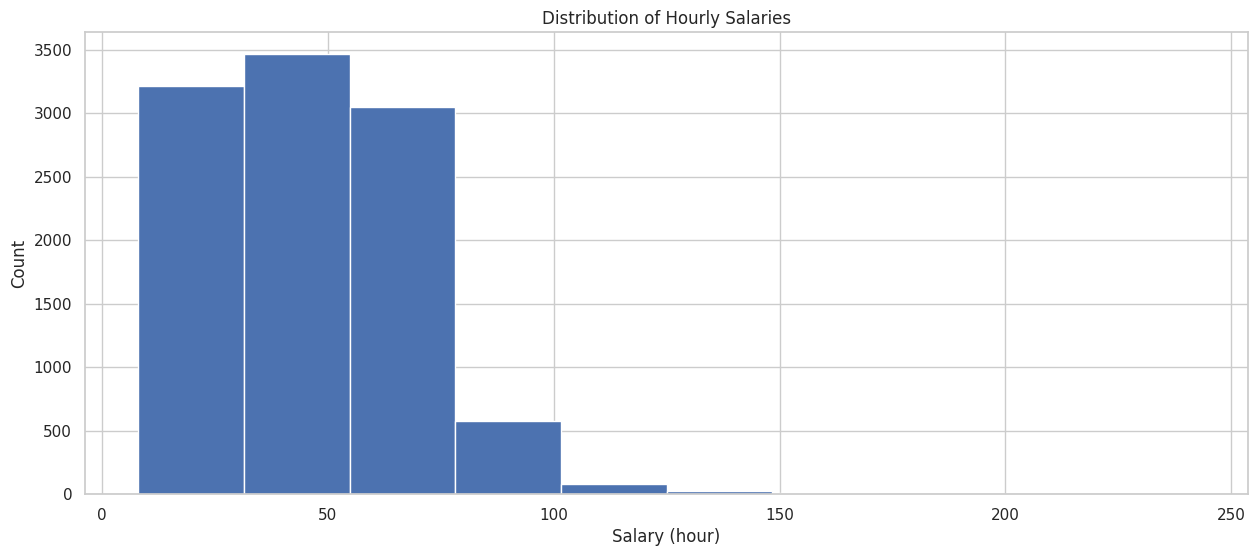

In [84]:
plt.figure(figsize=(15,6))
plt.hist(hour_salary_df['salary_hour_avg'])
plt.title('Distribution of Hourly Salaries')
plt.xlabel('Salary (hour)')
plt.ylabel('Count')
plt.show()


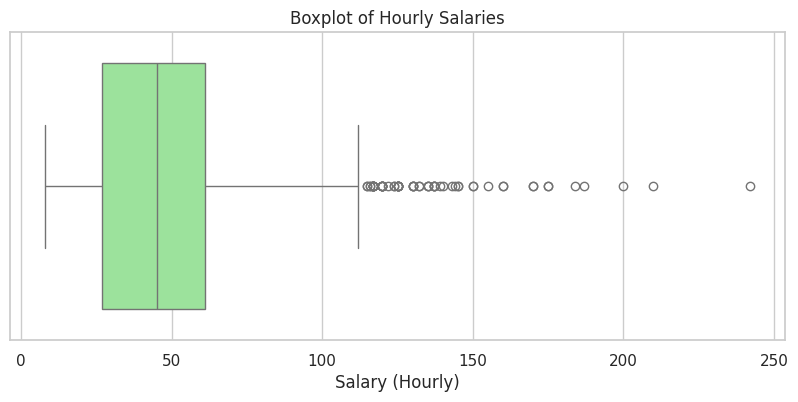

In [85]:
plt.figure(figsize=(10,4))
sns.boxplot(x=hour_salary_df['salary_hour_avg'], color='lightgreen')
plt.title('Boxplot of Hourly Salaries')
plt.xlabel('Salary (Hourly)')
plt.show()


In [86]:
hour_salary_df[hour_salary_df['salary_hour_avg'] > 250]

,job_title_short,job_domain,job_location,job_via,job_schedule_type,job_work_from_home,job_no_degree_mention,job_country,salary_rate,salary_hour_avg,company_name,job_skills


In [87]:
hour_salary_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10434 entries, 3 to 32671
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   job_title_short        10434 non-null  object
 1   job_domain             10434 non-null  object
 2   job_location           10434 non-null  object
 3   job_via                10424 non-null  object
 4   job_schedule_type      10434 non-null  object
 5   job_work_from_home     10434 non-null  bool  
 6   job_no_degree_mention  10434 non-null  bool  
 7   job_country            10434 non-null  object
 8   salary_rate            10434 non-null  object
 9   salary_hour_avg        10434 non-null  int64 
 10  company_name           10434 non-null  object
 11  job_skills             9094 non-null   object
dtypes: bool(2), int64(1), object(9)
memory usage: 917.1+ KB


### Job Locations
Which locations appear most frequently?

How many jobs are listed as remote vs on-site (using the job_work_from_home boolean)?

Which locations have the highest concentration of postings?

13.What percentage of job postings are missing location data?

In [88]:
loc_freq = (
    hour_salary_df
    .groupby('job_title_short')['job_location']
    .value_counts()
    .groupby('job_title_short')
    .head(5)   # top 5 for each job
    .reset_index(name = "count")
)
loc_freq.head(20)

,job_title_short,job_location,count
0,Business Analyst,Anywhere,74
1,Business Analyst,"Atlanta, GA",15
2,Business Analyst,"Charlotte, NC",13
3,Business Analyst,"Dallas, TX",11
4,Business Analyst,"Austin, TX",10
5,Cloud Engineer,Anywhere,3
6,Cloud Engineer,"Atlanta, GA",2
7,Cloud Engineer,"Hartford, CT",2
8,Cloud Engineer,"Albuquerque, NM",1
9,Cloud Engineer,Australia,1


In [89]:
hour_salary_df['job_location'].nunique()

1298

In [90]:
hour_salary_df['job_title_short'].nunique()

10

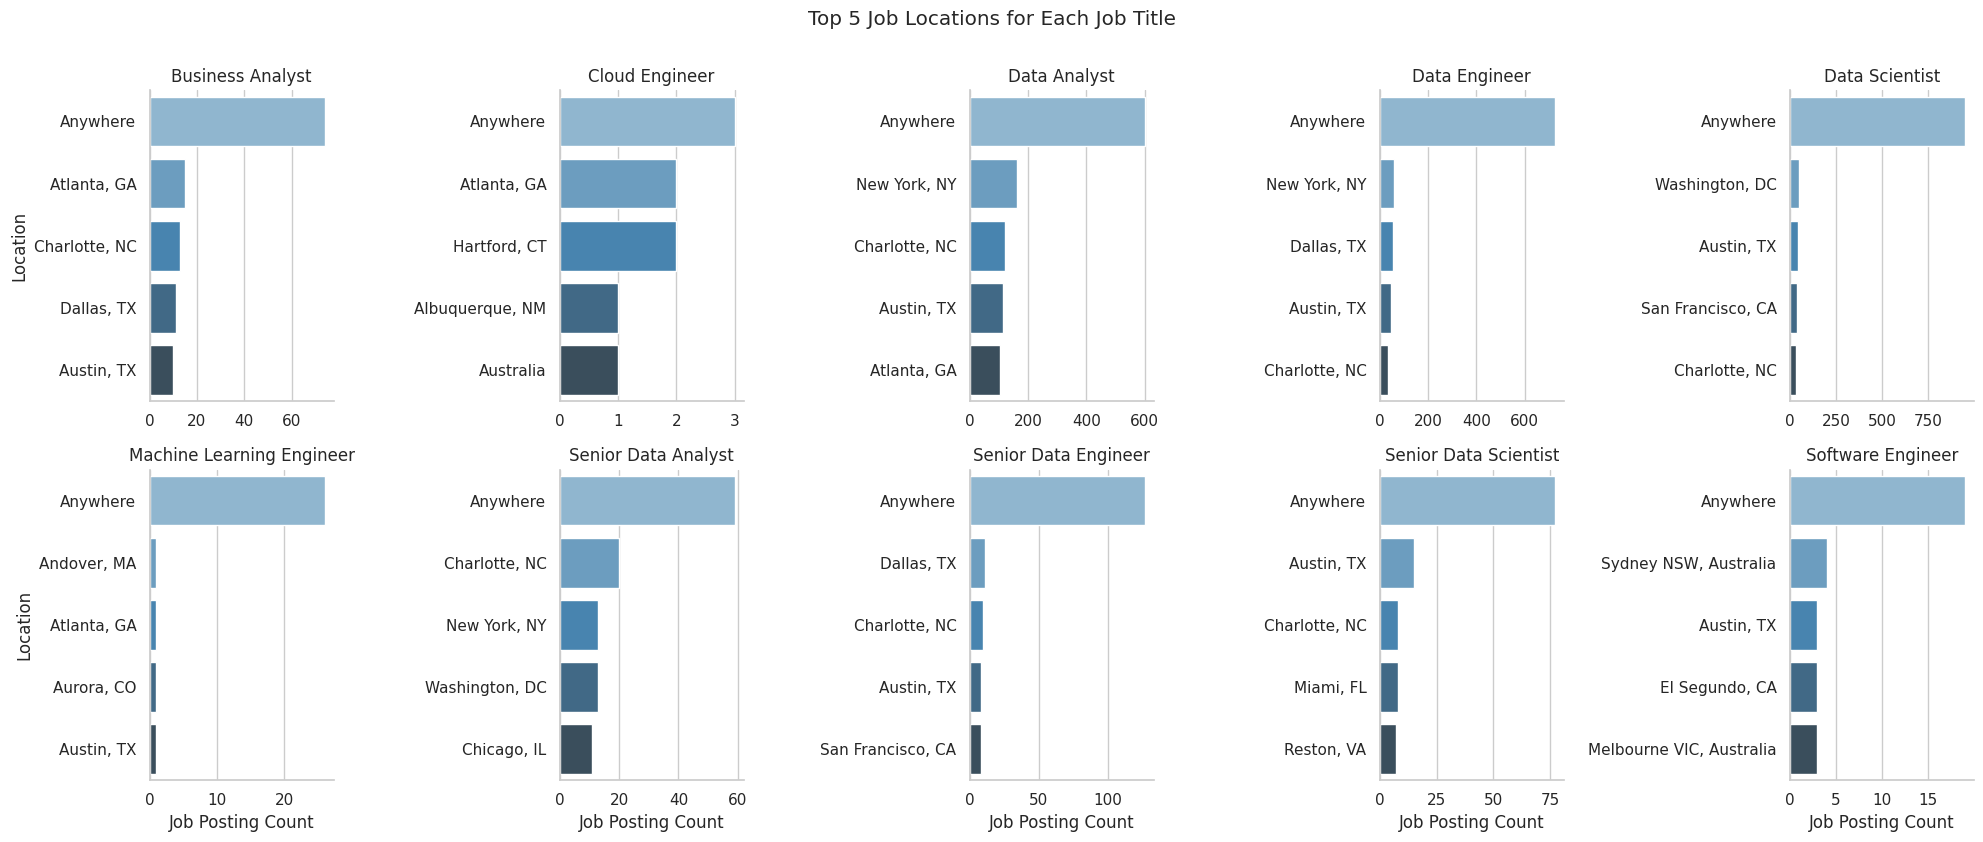

In [91]:

sns.set(style="whitegrid")
g = sns.FacetGrid(
    loc_freq,
    col="job_title_short",
    col_wrap=5,           # 3 plots per row (adjust if needed)
    height=4,
    sharex= False,
    sharey = False
)

g.map_dataframe(
    sns.barplot,
    x="count",
    y="job_location",
    palette="Blues_d"
)

g.set_titles("{col_name}")
g.set_axis_labels("Job Posting Count", "Location")
g.fig.suptitle("Top 5 Job Locations for Each Job Title", y=1.05)
plt.show()


### Posting Channels & Job Sourcing

Which platforms or sources appear most often in job_via?

Are there channels that rarely post jobs?

Does any posting source have unusually high missing values?

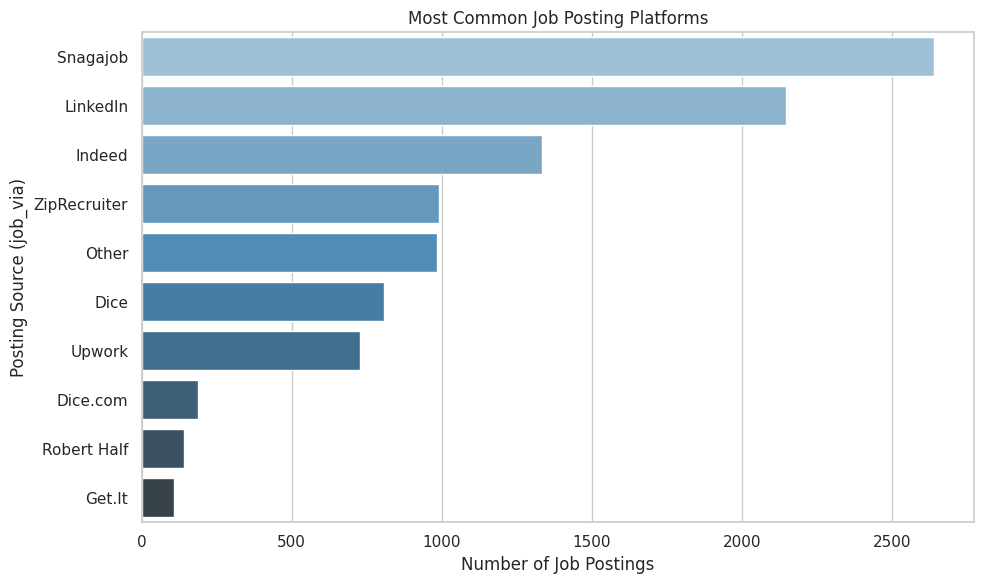

In [92]:
platform_counts = hour_salary_df['job_via'].value_counts()
top_ten_platforms = platform_counts.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_ten_platforms.values, y=top_ten_platforms.index, palette='Blues_d')

plt.title("Most Common Job Posting Platforms")
plt.xlabel("Number of Job Postings")
plt.ylabel("Posting Source (job_via)")
plt.tight_layout()
plt.show()

In [96]:
platform_counts.head(21)

,count
job_via,
Snagajob,2641
LinkedIn,2147
Indeed,1333
ZipRecruiter,990
Other,983
Dice,809
Upwork,728
Dice.com,187
Robert Half,141


In [94]:
platform_counts.tail()

,count
job_via,
The Elite Job,35
"Austin, TX - Geebo",32
Adzuna,32
Motion Recruitment,31
Talent.com,30


In [95]:
len(platform_counts)

19

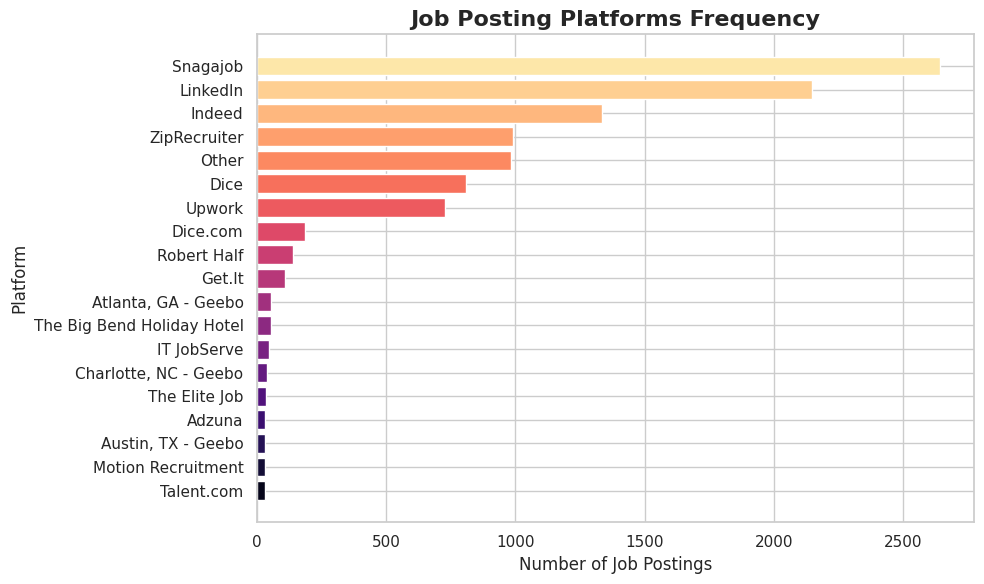

In [103]:

# Make sure the counts are sorted
platform_counts_sorted = platform_counts.sort_values()

plt.figure(figsize=(10, 6))

# Horizontal bar chart
bars = plt.barh(
    platform_counts_sorted.index,
    platform_counts_sorted.values,
    color=sns.color_palette("magma", len(platform_counts_sorted))
)

plt.title("Job Posting Platforms Frequency", fontsize=16, weight='bold')
plt.xlabel("Number of Job Postings")
plt.ylabel("Platform")
plt.tight_layout()
plt.show()
